# Introduction to Neural Networks (Complete)
The first cells are already filled in. They import packages, load the data, and include functions for data visualization.

In [1]:
# import basic packages
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# load .mat data (as np arrays)
from scipy.io import loadmat
data = loadmat('digit_data.mat')

In [3]:
# set up data
X = data['X']                   # features
y = data['y']                   # labels

m = X.shape[0]                  # 5000 digits
n = X.shape[1]                  # 400 features

In [4]:
# make y into an array of 1-hot, 10-element arrays
new_y = np.zeros((m, 10))

for i in range(m):
    new_y[i, y[i] % 10] = 1     # replace each element w a 10 element array
    
y = new_y.astype(int)

In [5]:
# train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [6]:
def show_digit(index, dataset=X):
    """ Displays handwritten digit given its index """
    plt.clf()
    plt.imshow(np.rot90(np.flip(np.reshape(dataset[index], (20, 20)), axis=1)), 
               cmap=plt.cm.binary)
    plt.title('Digit Example')
    plt.axis('off')
    plt.show()
    return None

## Your turn! Let's make a neural network.
Now, you should do the following:
- Visualize some digits by calling the show_digit function
- Make a neural network using sklearn
- Test the accuracy of the network on never-before-seen digits
- See where the network fails

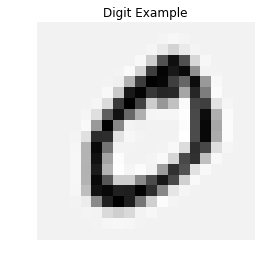

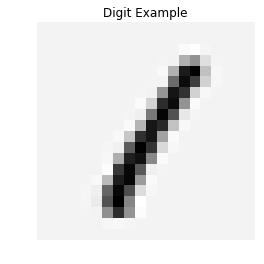

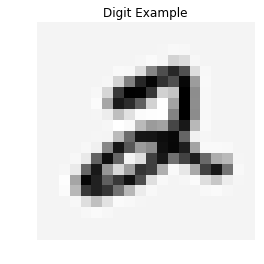

(None, None, None)

In [7]:
# call show_digit
show_digit(0), show_digit(500), show_digit(1000)

In [8]:
# make neural network
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier(hidden_layer_sizes=(200, 100, 50, 25), 
                   max_iter=1000,
                   random_state=1)
nn.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(200, 100, 50, 25), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [9]:
# determine accuracy on test set
from sklearn.metrics import accuracy_score
predictions = nn.predict(X_test)
accuracy_score(y_test, predictions)

0.907

In [10]:
# see where the network fails
np.where(predictions != y_test)

(array([  0,   0,   4,   4,  11,  14,  26,  26,  30,  30,  52,  54,  60,
         60,  66,  66,  75,  90,  90, 104, 104, 107, 109, 116, 132, 132,
        142, 142, 148, 182, 198, 198, 215, 216, 218, 221, 241, 273, 294,
        310, 310, 327, 327, 332, 346, 346, 348, 348, 357, 357, 367, 405,
        405, 427, 427, 472, 472, 478, 478, 486, 503, 515, 537, 539, 539,
        555, 555, 571, 571, 572, 572, 589, 589, 591, 598, 601, 611, 611,
        611, 613, 613, 617, 622, 623, 623, 660, 660, 672, 674, 680, 682,
        699, 711, 711, 724, 724, 725, 731, 731, 735, 738, 738, 753, 753,
        762, 764, 766, 768, 788, 789, 792, 807, 810, 810, 812, 818, 818,
        840, 846, 860, 861, 861, 865, 872, 872, 877, 877, 911, 911, 915,
        915, 929, 938, 964, 965, 965]),
 array([5, 6, 3, 5, 2, 7, 4, 9, 0, 2, 6, 7, 2, 4, 1, 7, 6, 7, 9, 7, 9, 3,
        8, 7, 3, 9, 1, 8, 1, 3, 3, 7, 5, 8, 7, 2, 8, 5, 8, 2, 3, 2, 3, 3,
        2, 5, 3, 5, 1, 9, 2, 2, 8, 8, 9, 2, 8, 7, 9, 9, 5, 3, 5, 7, 9, 2,
        

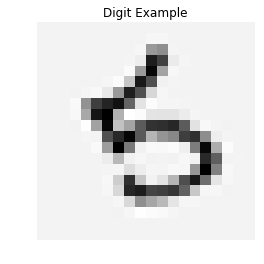

In [11]:
# see specific digit where network fails
show_digit(index=0, dataset=X_test)

In [17]:
y_test[0], np.where(y_test[0] == 1)

(array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0]), (array([5]),))

In [18]:
predictions[0], np.where(predictions[0] == 1)

(array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0]), (array([6]),))